### Getting started with NLTK

In [12]:
import nltk
import matplotlib.pyplot as plt

In [2]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [4]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [5]:
text2

<Text: Sense and Sensibility by Jane Austen 1811>

### Searching Text

In [6]:
#concordance(occurance of a word in a context) of a given word in a text
text1.concordance("monstrous")

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


In [7]:
#find out which words are used in similar context as "monstrous"
text1.similar("monstrous")

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless


In [8]:
text2.similar("monstrous")

very so exceedingly heartily a as good great extremely remarkably
sweet vast amazingly


In [9]:
#contexts that are shared by one or two words
text2.common_contexts(["monstrous", "very"])

a_pretty am_glad a_lucky is_pretty be_glad


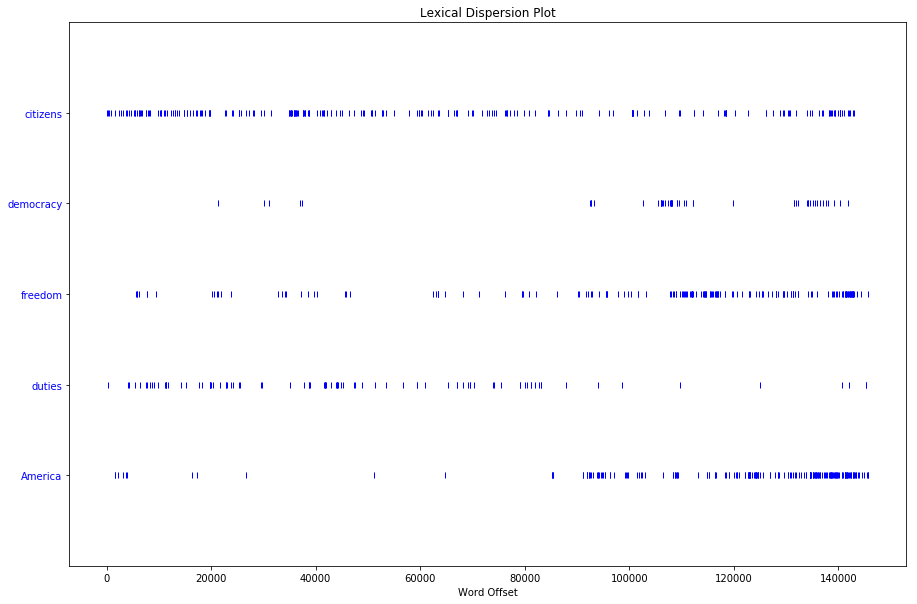

In [16]:
#
plt.figure(figsize=(15,10))
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])
plt.show()

### Counting Vocabulary

In [20]:
tokens = len(text3)#number of characters in a text

44764

In [22]:
#list of vocubulary in a text
sorted(set(text3))[:20]

['!',
 "'",
 '(',
 ')',
 ',',
 ',)',
 '.',
 '.)',
 ':',
 ';',
 ';)',
 '?',
 '?)',
 'A',
 'Abel',
 'Abelmizraim',
 'Abidah',
 'Abide',
 'Abimael',
 'Abimelech']

In [24]:
types =len(set(text3))
types

2789

In [26]:
lexicalrichness = len(text3) / len(set(text3))#how many times a word is used in average
lexicalrichness

16.050197203298673

In [27]:
text3.count("smote")#how many times a particular word appears in a text

5

In [32]:
100 * text5.count('lol') / len(text5)#percentage of a particular word used in a text

1.5640968673628082

In [33]:
#writing a function for lexical diversity and percentage
def lexical_diversity(text):
    return len(text) / len(set(text))

def percentage(count, total):
    return 100 * count / total

In [36]:
print(lexical_diversity(text4),percentage(text3.count('smote'),len(text3)))

14.941049825712529 0.01116968992940756


### Indexing lists

In [39]:
print(text4[173],text4.index('awaken'))

awaken 173


In [40]:
#joining words of a list
' '.join(['Monty', 'Python'])

'Monty Python'

### Computing with Language: Simple Statistics

In [50]:
#Frequency distribution of a text
fdist1 = FreqDist(text1)#gives a dictionary with keys as word and frequency as numbers
len(fdist1)

19317

In [61]:
vocabulary1 = fdist1.keys()

In [52]:
fdist1['whale']

906

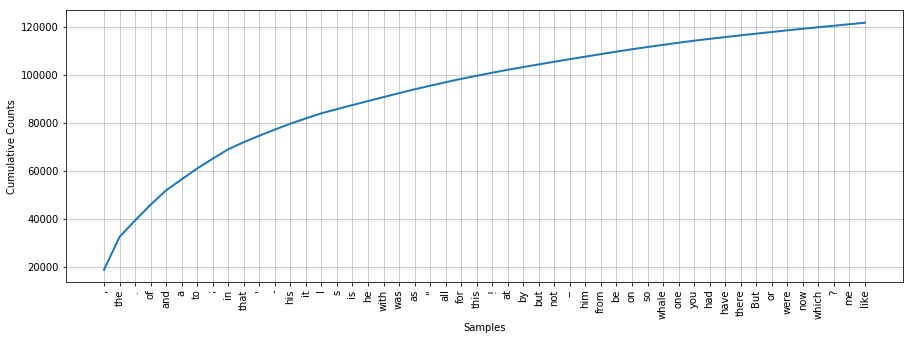

In [59]:
#cumulative distribution of the 50 most frequently used words in a text 
plt.figure(figsize=(15,5))
fdist1.plot(50, cumulative=True)
plt.show()

In [65]:
#words that occur only once
hapaxes = fdist1.hapaxes()
hapaxes[:10]

['Herman',
 'Melville',
 ']',
 'ETYMOLOGY',
 'Late',
 'Consumptive',
 'School',
 'threadbare',
 'lexicons',
 'mockingly']

### Fine-Grained Selection of Words

In [66]:
#finding out words whose length is greater than 15
V = set(text1)
long_words = [w for w in V if len(w) > 15]
sorted(long_words)

['CIRCUMNAVIGATION',
 'Physiognomically',
 'apprehensiveness',
 'cannibalistically',
 'characteristically',
 'circumnavigating',
 'circumnavigation',
 'circumnavigations',
 'comprehensiveness',
 'hermaphroditical',
 'indiscriminately',
 'indispensableness',
 'irresistibleness',
 'physiognomically',
 'preternaturalness',
 'responsibilities',
 'simultaneousness',
 'subterraneousness',
 'supernaturalness',
 'superstitiousness',
 'uncomfortableness',
 'uncompromisedness',
 'undiscriminating',
 'uninterpenetratingly']

In [67]:
#finding out long words(more than 7 letters) whose count is greater than 7
fdist5 = FreqDist(text5)
sorted([w for w in set(text5) if len(w) > 7 and fdist5[w] > 7])

['#14-19teens',
 '#talkcity_adults',
 '((((((((((',
 '........',
 'Question',
 'actually',
 'anything',
 'computer',
 'cute.-ass',
 'everyone',
 'football',
 'innocent',
 'listening',
 'remember',
 'seriously',
 'something',
 'together',
 'tomorrow',
 'watching']

### Collocations and Bigrams

In [68]:
#A collocation is a sequence of words that occur together unusually often. Thus red wine is a collocation.
#A word pair is known as bigrams
text4.collocations()#to find bigrams that occur more often than one would expect based on the frequency of individual words.

United States; fellow citizens; four years; years ago; Federal
Government; General Government; American people; Vice President; Old
World; Almighty God; Fellow citizens; Chief Magistrate; Chief Justice;
God bless; every citizen; Indian tribes; public debt; one another;
foreign nations; political parties


In [69]:
text8.collocations()

would like; medium build; social drinker; quiet nights; non smoker;
long term; age open; Would like; easy going; financially secure; fun
times; similar interests; Age open; weekends away; poss rship; well
presented; never married; single mum; permanent relationship; slim
build


### Counting Other Things

In [70]:
#counting the frequency of  length of words in a text
fdist = FreqDist([len(w) for w in text1])
fdist.keys()

dict_keys([1, 4, 2, 6, 8, 9, 11, 5, 7, 3, 10, 12, 13, 14, 16, 15, 17, 18, 20])

In [71]:
fdist.items()

dict_items([(1, 47933), (4, 42345), (2, 38513), (6, 17111), (8, 9966), (9, 6428), (11, 1873), (5, 26597), (7, 14399), (3, 50223), (10, 3528), (12, 1053), (13, 567), (14, 177), (16, 22), (15, 70), (17, 12), (18, 1), (20, 1)])

In [72]:
fdist.max()

3

In [73]:
fdist[3]

50223

In [74]:
fdist.freq(3)#percentage of length of word 3 in the text nearly 20% 

0.19255882431878046